# 1. <span style = "color : blue;">Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf as Autocorrelation
from statsmodels.graphics.tsaplots import plot_pacf as ParcialAutocorrelation
from statsmodels.tsa.stattools import adfuller as A_DickeyFuller
from statsmodels.tsa import seasonal
from statsmodels.tsa.stattools import adfuller
plt.style.use("dark_background")
plt.rcParams.update({
    "axes.grid" : False
})

import warnings
warnings.filterwarnings("ignore")

# 2. <span style = "color : blue;"> Import the data

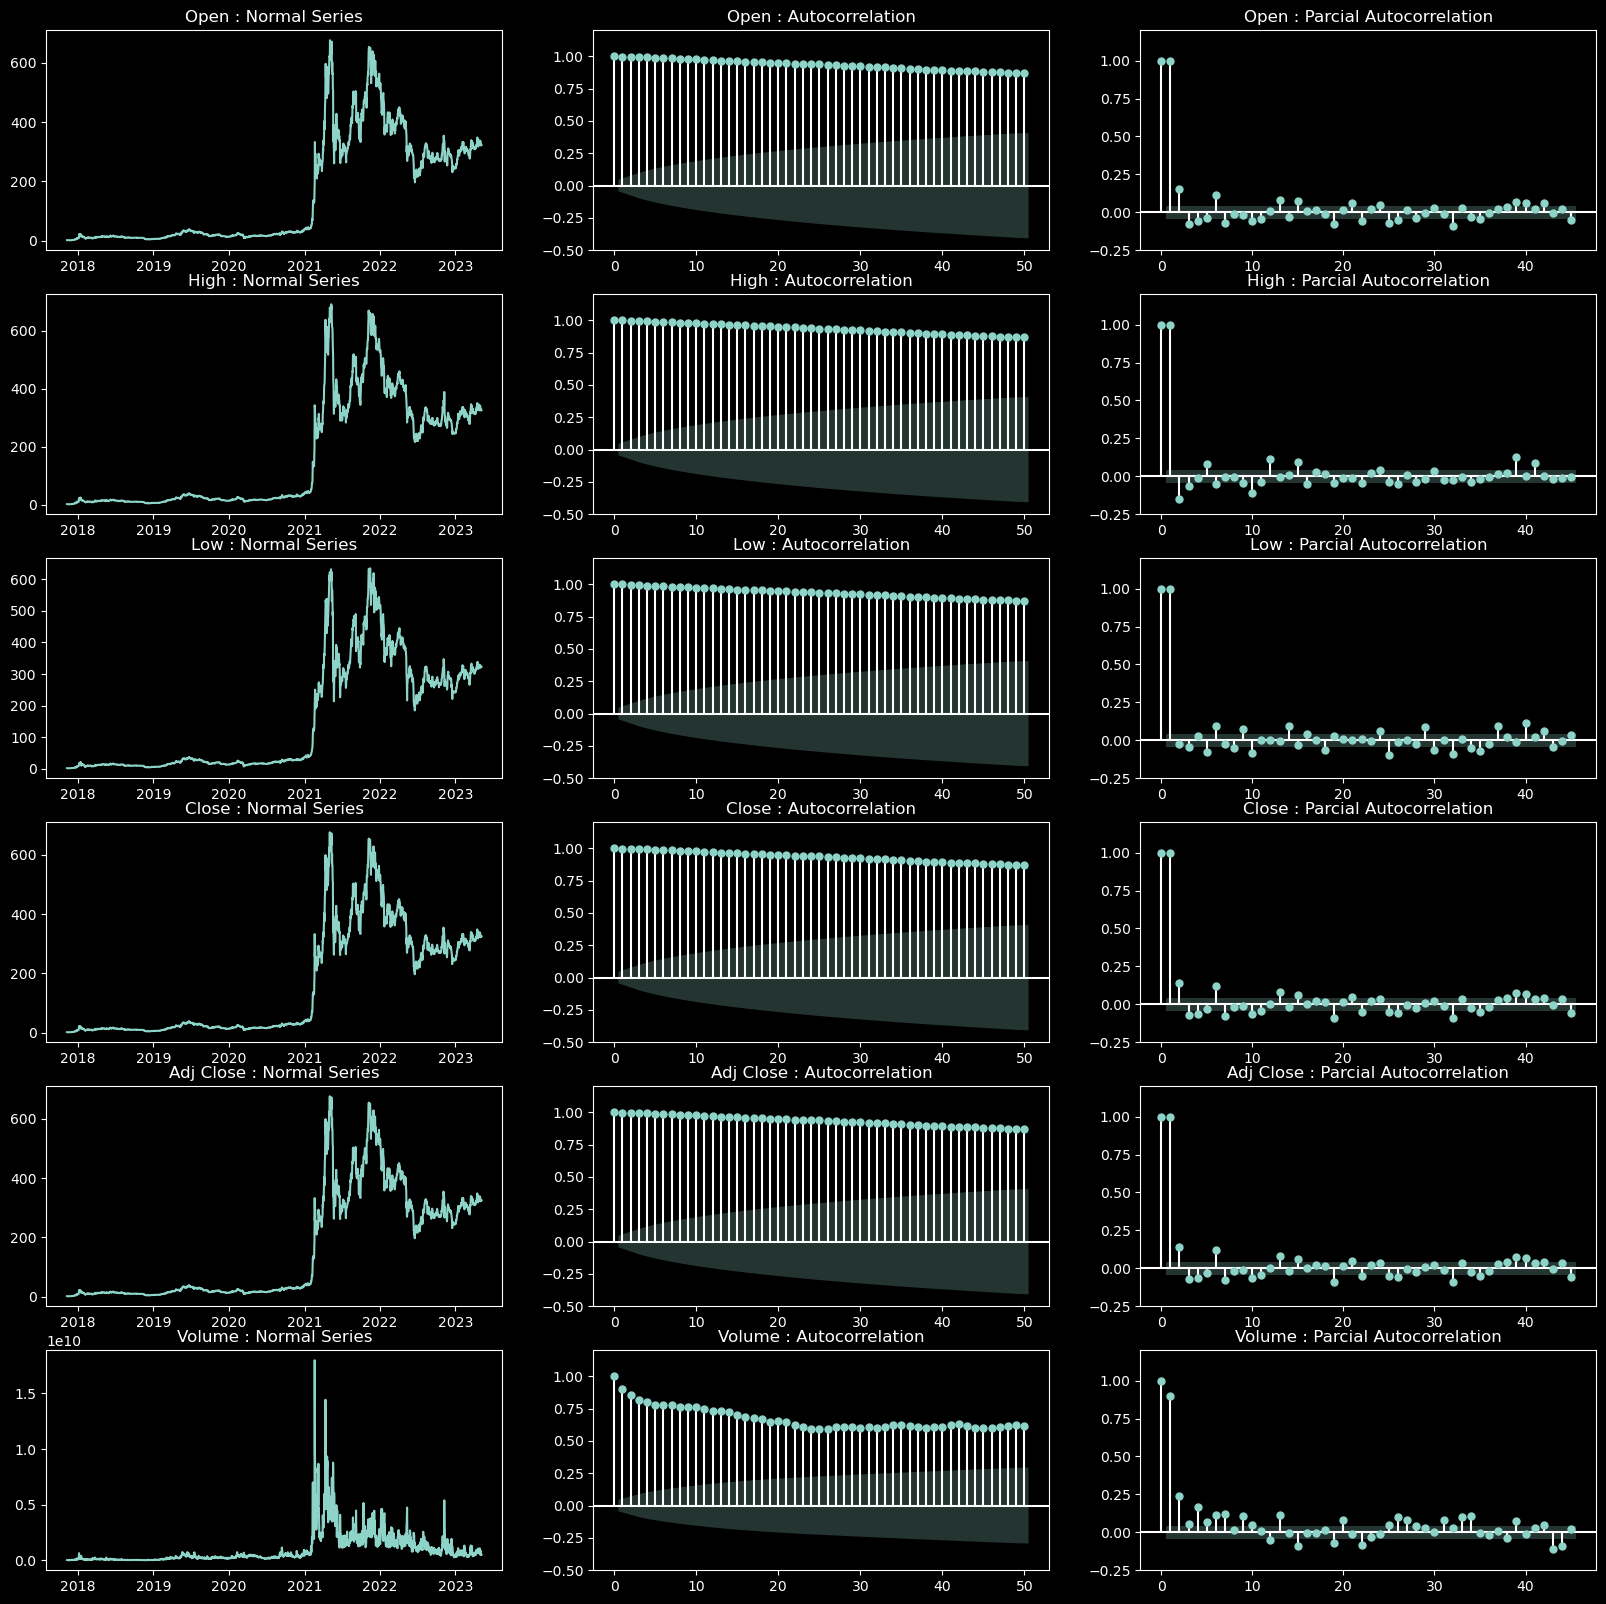

In [2]:
df = pd.read_csv("/kaggle/input/timeseries-bitcoins/BNB.csv", parse_dates= ["Date"], index_col= "Date")

fig, axes = plt.subplots(6, 3, figsize = (20, 20))

for x, name in enumerate(df.columns):
    y = 0
    axes[x, y].plot(df[name])
    axes[x,y].set_title("{} : Normal Series".format(name))

    Autocorrelation(df[name], lags= 50, ax = axes[x, y + 1])
    axes[x, y + 1].set_ylim(-.5, 1.2)
    axes[x, y + 1].set_title("{} : Autocorrelation".format(name))

    ParcialAutocorrelation(df[name], lags= 45, ax = axes[x, y + 2])
    axes[x, y + 2].set_ylim(-.25, 1.2)
    axes[x, y + 2].set_title("{} : Parcial Autocorrelation".format(name))

# 3. <span style="color: blue;">Stationarity</span>

In [3]:
mean1, mean2 = df["Close"][:100].mean(), df["Close"][100:].mean()

print(f"The mean in the first sample is: {mean1:.2f}\nThe mean in the second sample is: {mean2:.2f}")
print("-----------------------------------------------")

var1, var2 = df["Close"][:100].var(), df["Close"][100:].var()
print(f"The variance in the first sample is: {var1:.2f}\nThe variance in the second sample is: {var2:.2f}")

The mean in the first sample is: 7.99
The mean in the second sample is: 164.86
-----------------------------------------------
The variance in the first sample is: 35.04
The variance in the second sample is: 33417.16


To interpret these data as tests of stationarity for a series, we can consider the following aspects:

Mean: Stationarity in mean implies that the series has a constant mean over time. In this case, the significant difference between the means of the first sample (7.99) and the second sample (164.86) suggests that the series is not stationary in mean. There is a noticeable shift in the average level of the series between the two samples.

Variance: Stationarity in variance implies that the series has a constant variance over time. The significant difference between the variances of the first sample (35.04) and the second sample (33417.16) also indicates that the series is not stationary in variance. The variability of the series differs considerably between the two samples.

In summary, based on the results of the mean and variance tests, the series does not appear to be stationary in either aspect. However, to obtain a more comprehensive assessment of the stationarity of the series, the Dickey-Fuller test could be applied. The Dickey-Fuller test is a commonly used statistical test to check for stationarity in time series data.

## <span style = "color : blue;"> Aumented Dickey Fuller

In [4]:
ADF = A_DickeyFuller(df["Close"])
print(f"ADF Statistics : {ADF[0]:.3f}\np-value: {ADF[1]:.3f}")

ADF Statistics : -1.533
p-value: 0.517


Based on the results of the Dickey Fuller test, the interpretation of the data is as follows:

ADF Statistics: The ADF (Augmented Dickey-Fuller) statistic is -1.533. The ADF statistic is a negative value that measures the amount of autoregressive behavior in the series. In this case, the ADF statistic indicates a value of -1.533.

p-value: The p-value associated with the ADF test is 0.517. The p-value is a measure of the strength of evidence against the null hypothesis of non-stationarity. In this case, the p-value is 0.517.

Interpretation:

Since the ADF statistic (-1.533) is less than critical values at conventional significance levels (such as -2.882 at 1% level, -2.578 at 5% level, and -2.327 at 10% level), we cannot reject the null hypothesis.

The p-value (0.517) is greater than the common significance level of 0.05. Therefore, we also fail to reject the null hypothesis based on the p-value.

In summary, based on the ADF statistic and the p-value, there is not enough evidence to reject the null hypothesis of non-stationarity. This suggests that the series may be non-stationary, meaning it does not exhibit a constant mean and may have some autoregressive behavior.

# <span style = "color : blue;">**Series Decomposition**

In [5]:
decomposed_model = seasonal.seasonal_decompose(df["Close"], model = "additive", period = 20)

Text(0.5, 1.0, 'Irregular Variations of BNB Closing Price')

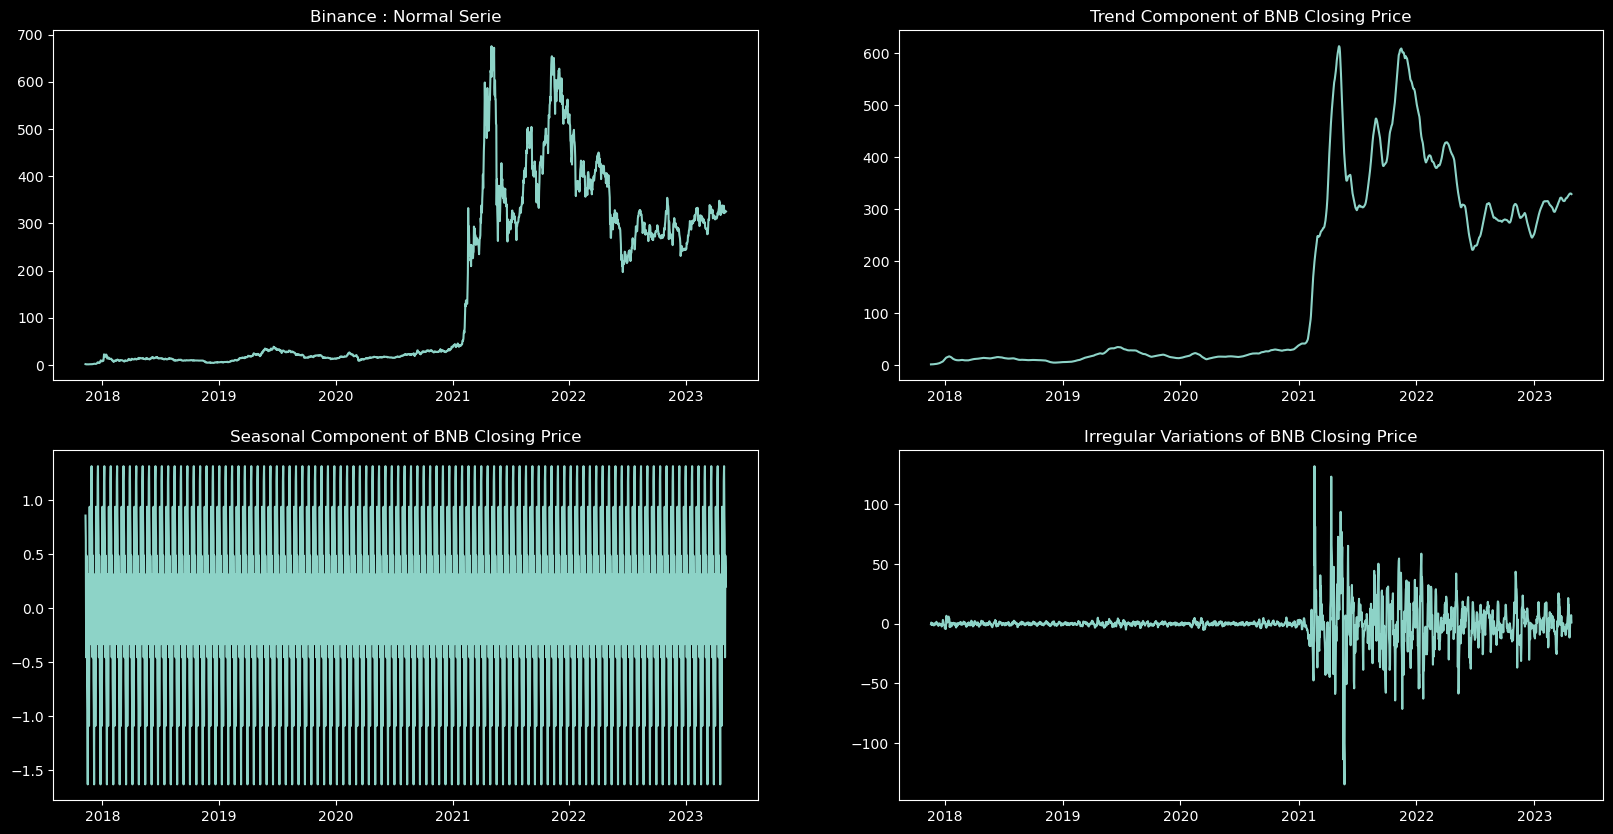

In [6]:
fig, axes = plt.subplots(2, 2, figsize = (20, 10))

axes[0, 0].plot(df["Close"])
axes[0,0].set_title("Binance : Normal Serie")

axes[0, 1].plot(decomposed_model.trend)
axes[0,1].set_title("Trend Component of BNB Closing Price")

axes[1, 0].plot(decomposed_model.seasonal)
axes[1, 0].set_title("Seasonal Component of BNB Closing Price")

axes[1, 1].plot(decomposed_model.resid)
axes[1, 1].set_title("Irregular Variations of BNB Closing Price")


In [7]:
adf_result = adfuller(decomposed_model.resid[np.where(np.isfinite(decomposed_model.resid))[0]],autolag='AIC')
print("p-value of the ADF test on irregular variations in BNB price data:",
adf_result[1])

p-value of the ADF test on irregular variations in BNB price data: 2.187334070115709e-27


The series decomposition was performed on the time series data with the objective of separating it into its constituent components: trend, seasonal, and residual. The chosen decomposition model was an additive model with a periodicity of 20.

Following the decomposition, an augmented Dickey-Fuller (ADF) test was conducted on the residuals obtained from the decomposition. The purpose of the ADF test is to assess the stationarity of the residuals, which represent the irregular variations in the data.

The results of the ADF test revealed an extremely small p-value (2.1873340701156466e-27). This exceptionally low p-value provides strong evidence to reject the null hypothesis of non-stationarity in the residuals. Consequently, it can be concluded that, after the decomposition process, the residuals have achieved stationarity.

In summary, the series decomposition successfully achieved the objective of rendering the residuals (irregular variations) stationary. This outcome is significant for further analysis and modeling of the time series data, as it allows for the application of appropriate statistical techniques and assumptions based on stationarity.

In [8]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 32.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# <span style = "color : red;"> **WORKING IN...**

In [9]:
pip install backtesting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173818 sha256=c8699a1efadd65a5a962db4ade00f16e7bb4b3d08c955bb6017e151394081bc0
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting
Note: you may need to restart the kernel to use updated packages.


In [10]:
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa
from pmdarima import arima
from pmdarima import utils

from backtesting import Backtest, Strategy

Loading BokehJS ...

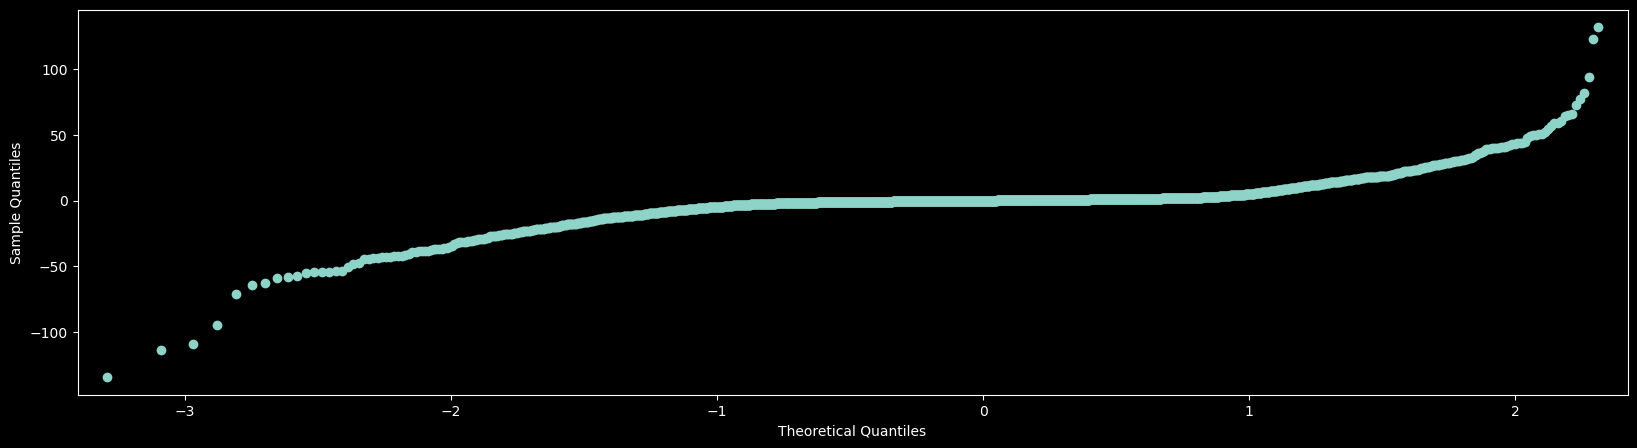

In [11]:
plt.rcParams.update({'figure.figsize':(20,5)})
sm.qqplot(decomposed_model.resid, line='s');

In [12]:
from scipy.stats import shapiro
stat, p = shapiro(decomposed_model.resid)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('La muestra parece normal (no se rechaza H0)')
else:
    print('La muestra no parece Normal (rechaza H0)')

Statistics=nan, p=1.000
La muestra parece normal (no se rechaza H0)


In [13]:
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = smtsa.ARIMA(df['Close'].tolist(), order=(ari, d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass

In [14]:
data_AIC = pd.DataFrame(aicVal, columns=['AR(p)', 'd', 'MA(q)', 'AIC'])
data_AIC

,AR(p),d,MA(q),AIC
0,0,1,0,15732.778582
1,0,1,1,15701.734881
2,0,1,2,15682.726408
3,1,1,0,15696.150831
4,1,1,1,15692.311223
5,1,1,2,15681.604811
6,2,1,0,15688.451533
7,2,1,1,15685.832137
8,2,1,2,15669.263666
9,0,2,0,17373.585972


In [15]:
print('Mejores parámetros ARIMA según AIC:\n')
data_AIC[data_AIC.AIC == data_AIC.AIC.min()]

Mejores parámetros ARIMA según AIC:



,AR(p),d,MA(q),AIC
8,2,1,2,15669.263666


In [16]:
pred=np.append([0,0], arima_obj_fit.fittedvalues.tolist())

n_first = pred.shape[0] - df.shape[0]
df['ARIMA']=pred[n_first:]#crea la variable

diffval=np.append([0,0], arima_obj_fit.resid)
df['diffval']=diffval[n_first:]

df.head()

,Open,High,Low,Close,Adj Close,Volume,ARIMA,diffval
Date,,,,,,,,
2017-11-09,2.05314,2.17423,1.89394,1.99077,1.99077,19192200.0,0.000000,1.990770
2017-11-10,2.00773,2.06947,1.64478,1.79684,1.79684,11155000.0,2.986125,-1.189285
2017-11-11,1.78628,1.91775,1.61429,1.67047,1.67047,8178150.0,1.603379,0.067091
2017-11-12,1.66889,1.67280,1.46256,1.51969,1.51969,15298700.0,1.504564,0.015126
2017-11-13,1.52601,1.73502,1.51760,1.68662,1.68662,12238800.0,1.366275,0.320345


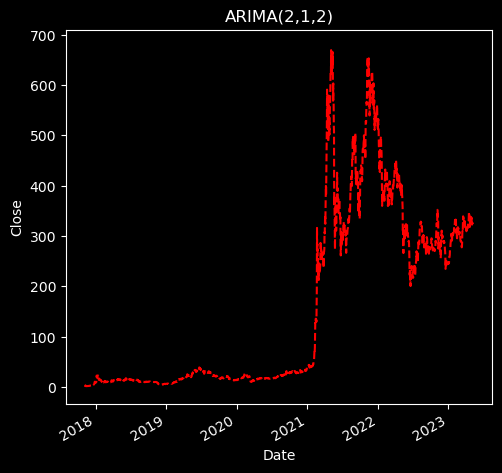

In [17]:
f, axarr = plt.subplots(1, sharex=True, figsize = (15, 5))
f.set_size_inches(5.5, 5.5)
df['Close'].plot(color='k', linestyle = '-', ax=axarr)
df['ARIMA'].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARIMA(2,1,2)')
plt.xlabel('Date')
plt.ylabel('Close');

In [18]:
arima_obj = smtsa.ARIMA(df['Close'].tolist(), order=(2, 1, 2))
arima_obj_fit = arima_obj.fit()
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2005
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -7829.632
Date:                Fri, 26 May 2023   AIC                          15669.264
Time:                        06:49:38   BIC                          15697.278
Sample:                             0   HQIC                         15679.549
                               - 2005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3479      0.042     -8.191      0.000      -0.431      -0.265
ar.L2         -0.6905      0.033    -20.864      0.000      -0.755      -0.626
ma.L1          0.2217      0.042      5.216      0.000       0.138       0.305
ma.L2          0.7186      0.030     23.611      0.000       0.659       0.778
sigma2       144.9121      1.205    120.227      0.000     142.550     147.274
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):            100688.34
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):             233.88   Skew:                            -0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

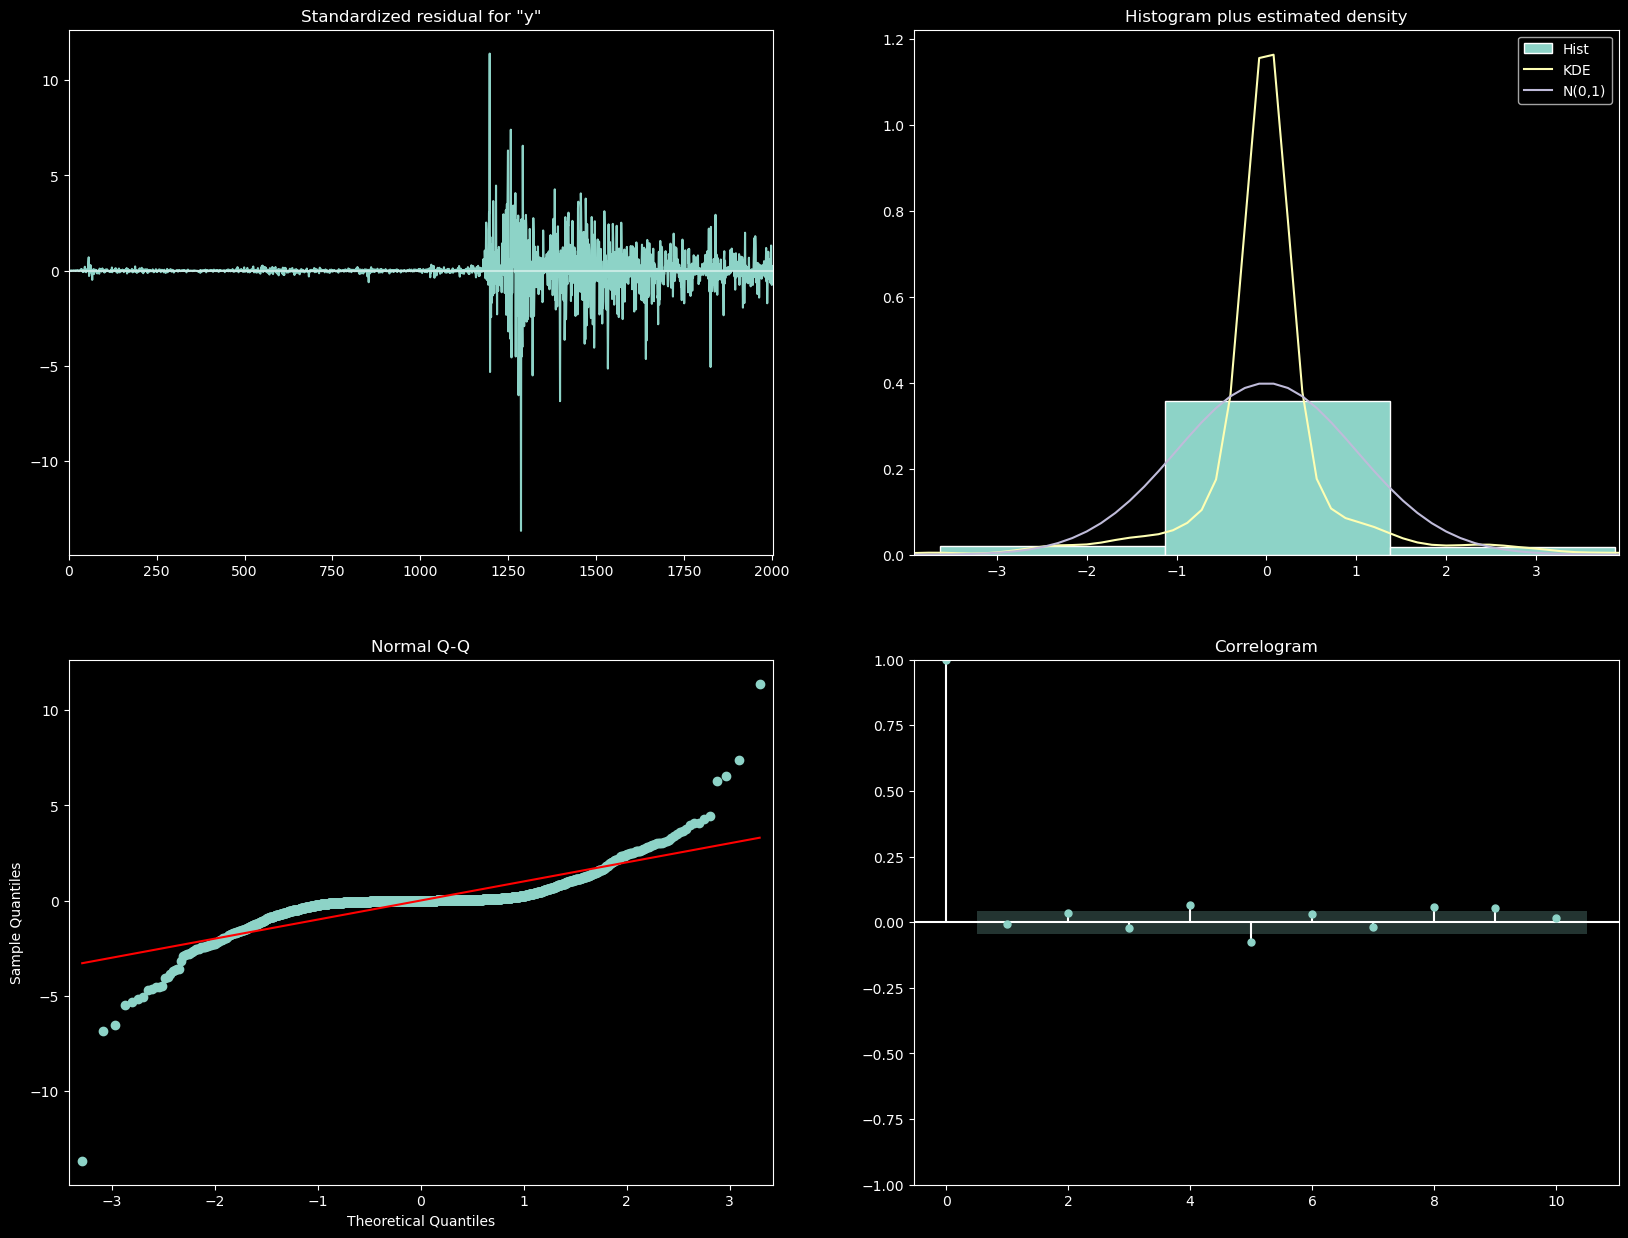

In [19]:
arima_obj_fit.plot_diagnostics(figsize=(20,15))
plt.show()

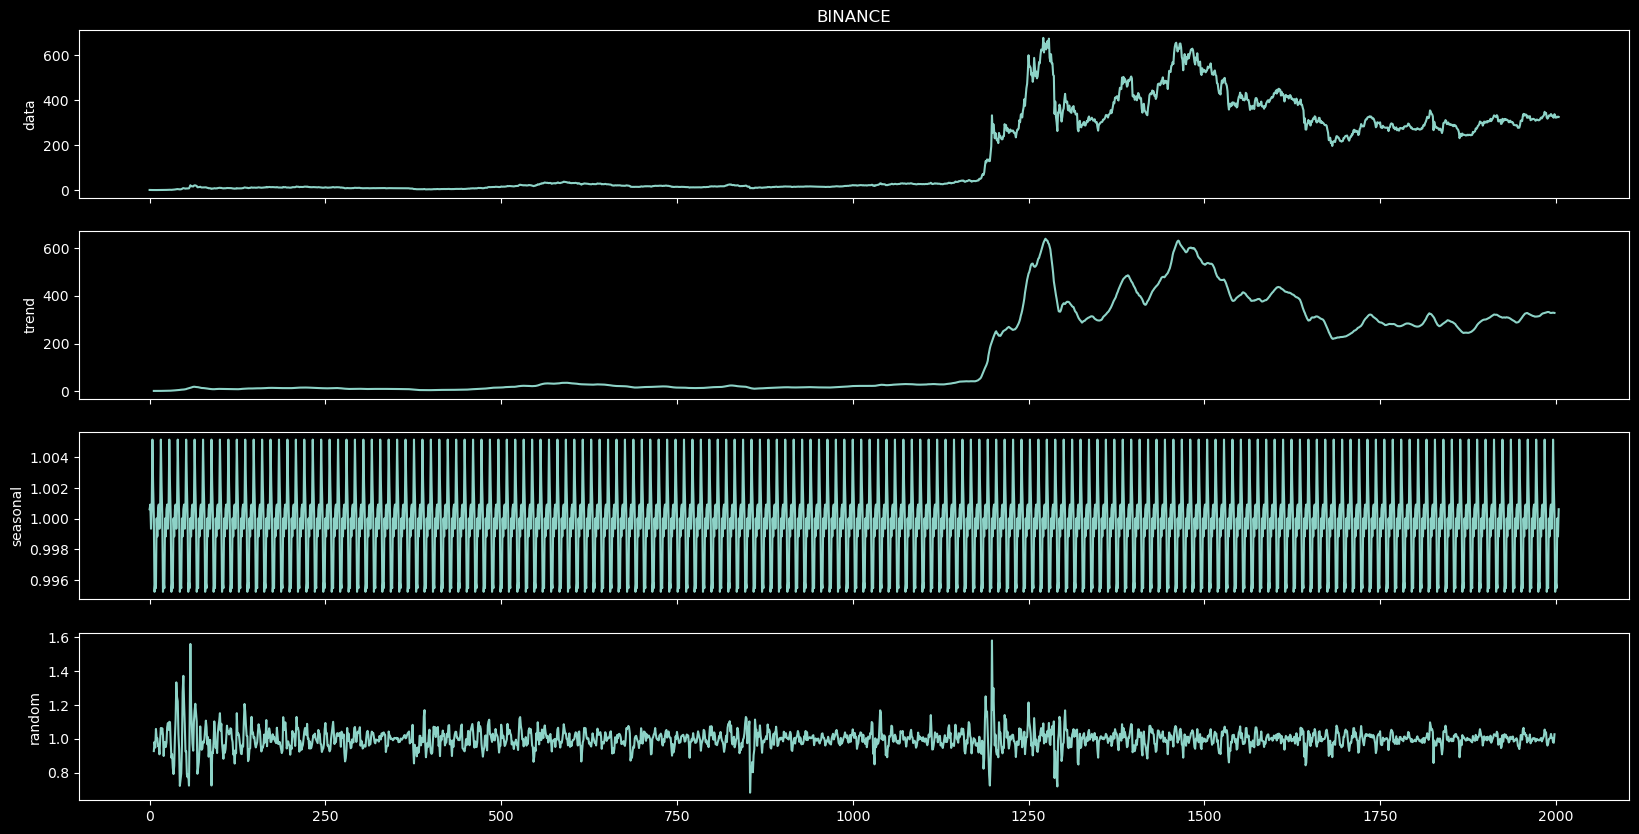

In [20]:
figure_kwargs = {'figsize': (20, 10)}
decomposed = arima.decompose(df.Close.values, 'multiplicative', m=12)
axes = utils.decomposed_plot(decomposed, figure_kwargs=figure_kwargs, show=False)

axes[0].set_title("BINANCE");

In [21]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return pd.DataFrame(np.convolve(interval, window, 'same'), columns=['MA'])

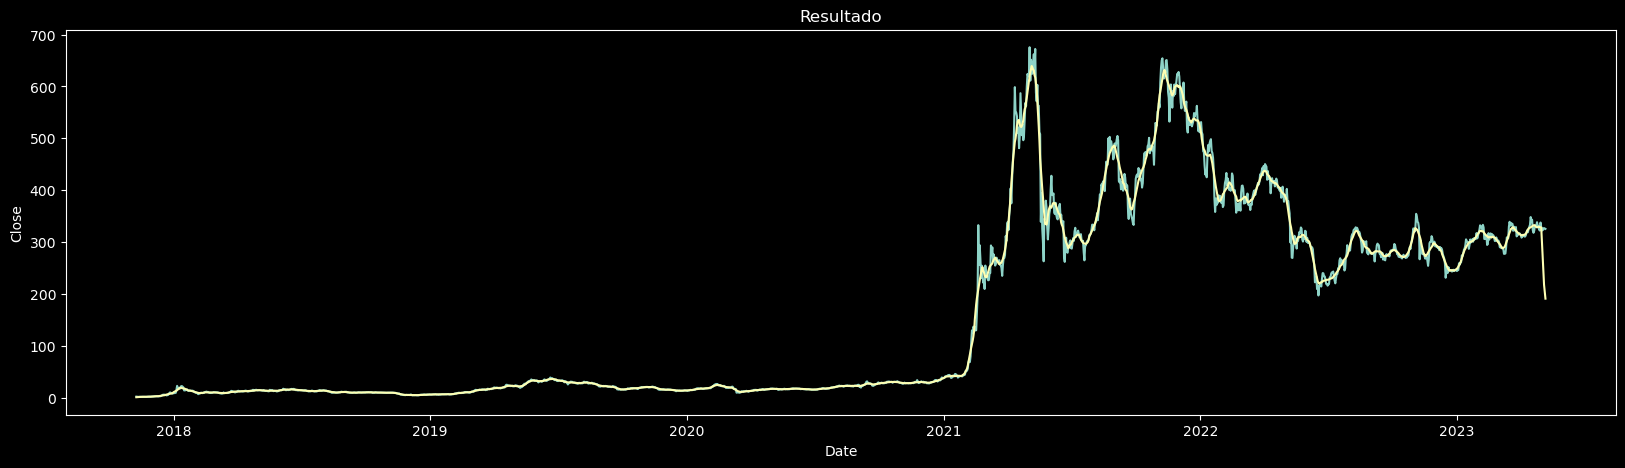

In [22]:
f.set_size_inches(5.5, 5.5)
fig, ax = plt.subplots() 
ax.plot(df.index, df.Close)
ax.plot(df.index, movingaverage(df.Close, 12));
plt.title("Resultado")
ax.set_xlabel('Date');
ax.set_ylabel('Close');

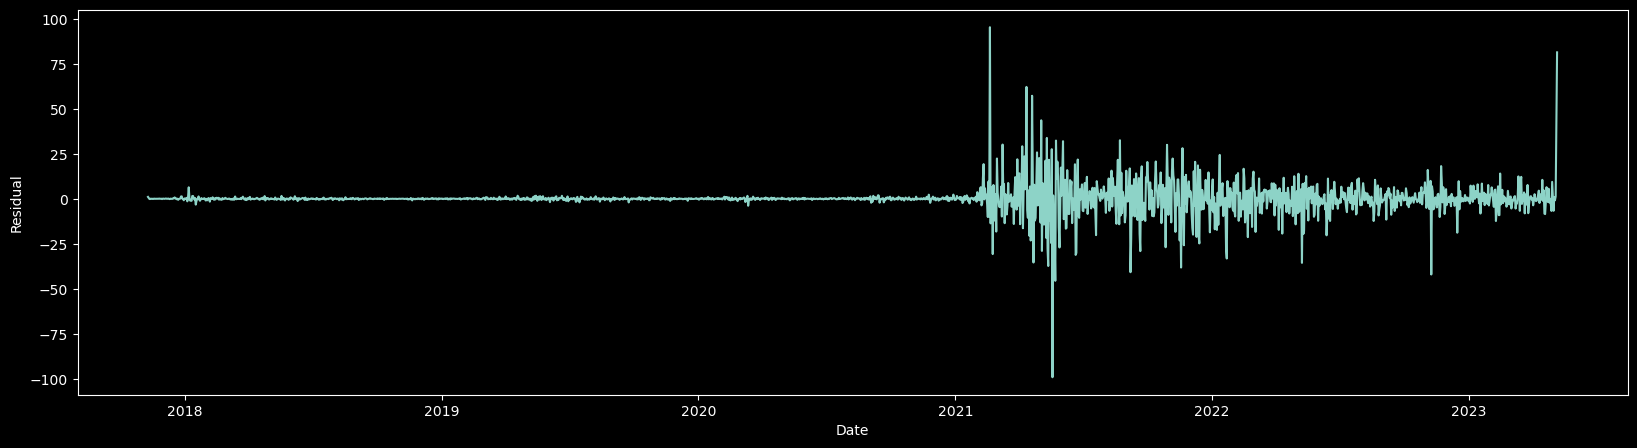

In [23]:
figure_kwargs = {'figsize': (20, 5)}
fig, ax = plt.subplots()
ax.plot(df.index, df.Close-movingaverage(df.Close,4).MA.values);
ax.set_xlabel('Date');
ax.set_ylabel('Residual');

In [24]:
from scipy.stats import kruskal

def seasonality_test(series, period):
        seasonal = False
        idx = np.arange(len(series)) % period
        H_statistic, p_value = kruskal(series, idx)
        if p_value <= 0.05:
            seasonal = True
        return seasonal

In [25]:
print("¿Es estacional la serie temporal BINANCE?:",
seasonality_test(df.Close, 12))

¿Es estacional la serie temporal BINANCE?: True


In [26]:
def single_exp_smoothing(x, alpha):
    F = [x[0]]
    for t in range(1, len(x)):
        F.append(alpha * x[t] + (1 - alpha) * F[t-1])
    return F

In [27]:
df['SES0'] = single_exp_smoothing(df['Close'], 0)
df['SES1'] = single_exp_smoothing(df['Close'], 1)

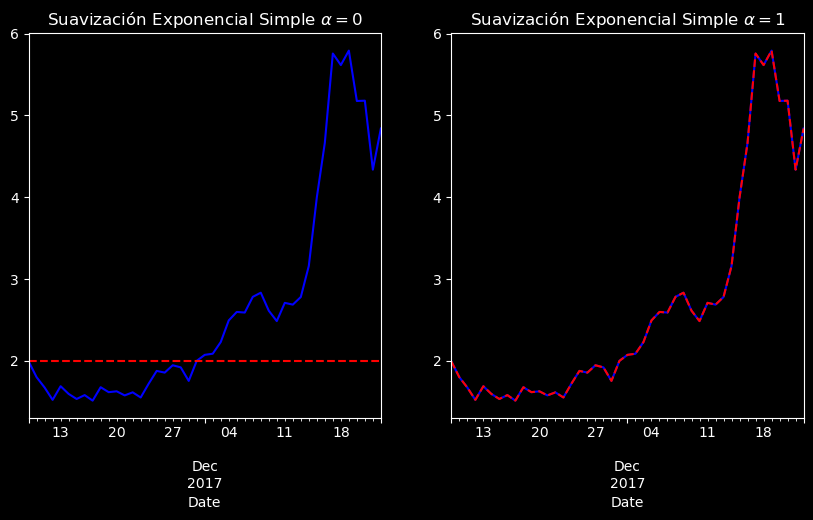

In [28]:
f, axarr = plt.subplots(1, 2, sharex=True, figsize = (20, 8))
f.set_size_inches(10, 5)

df['Close'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
df['SES0'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])


axarr[0].set_title(r'Suavización Exponencial Simple $\alpha=0$');
df['Close'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])

df['SES1'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title(r'Suavización Exponencial Simple $\alpha=1$');

In [29]:
df['SES2'] = single_exp_smoothing(df['Close'], 0.2)
df['SES6'] = single_exp_smoothing(df['Close'], 0.6)
df['SES8'] = single_exp_smoothing(df['Close'], 0.8)

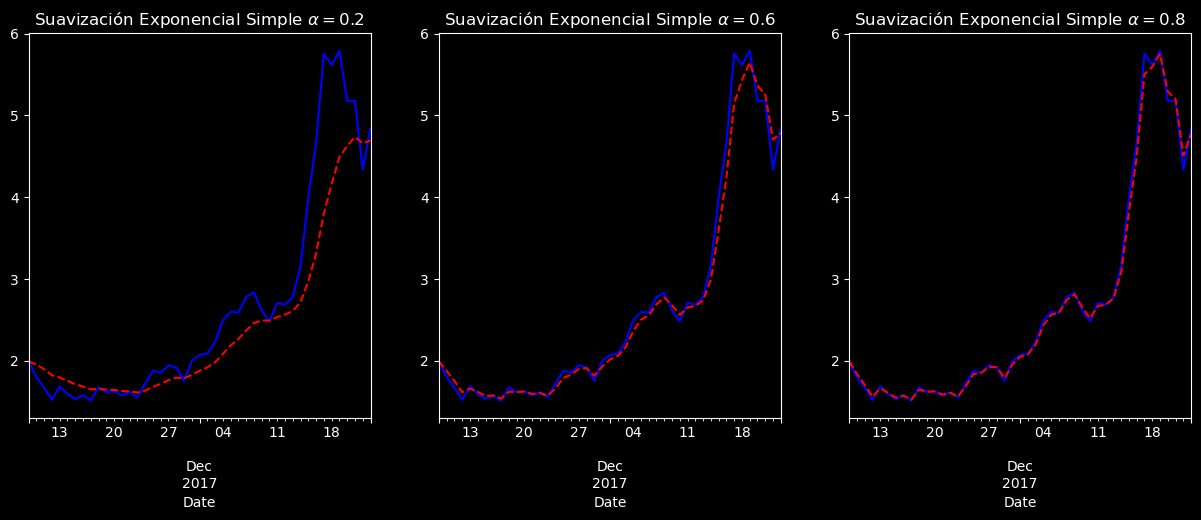

In [30]:
f, axarr = plt.subplots(1, 3, sharex=True, figsize = (20, 10))
f.set_size_inches(15, 5)

df['Close'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
df['SES2'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title(r'Suavización Exponencial Simple $\alpha=0.2$');

df['Close'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
df['SES6'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title(r'Suavización Exponencial Simple $\alpha=0.6$');

df['Close'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[2])
df['SES8'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[2])
axarr[2].set_title(r'Suavización Exponencial Simple $\alpha=0.8$');
leg = ax.legend();

In [31]:
def double_exp_smoothing(x, alpha, beta):
    yhat = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        if t==1:
            F, T= x[0], x[1] - x[0]
        F_n_1, F = F, alpha*x[t] + (1-alpha)*(F+T)
        T=beta*(F-F_n_1)+(1-beta)*T
        yhat.append(F+T)
    return yhat

In [32]:
df['DEF00'] = double_exp_smoothing(df['Close'], 0, 0)
df['DEF01'] = double_exp_smoothing(df['Close'], 0, 1)
df['DEF10'] = double_exp_smoothing(df['Close'], 1, 0)
df['DEF11'] = double_exp_smoothing(df['Close'], 1, 1)

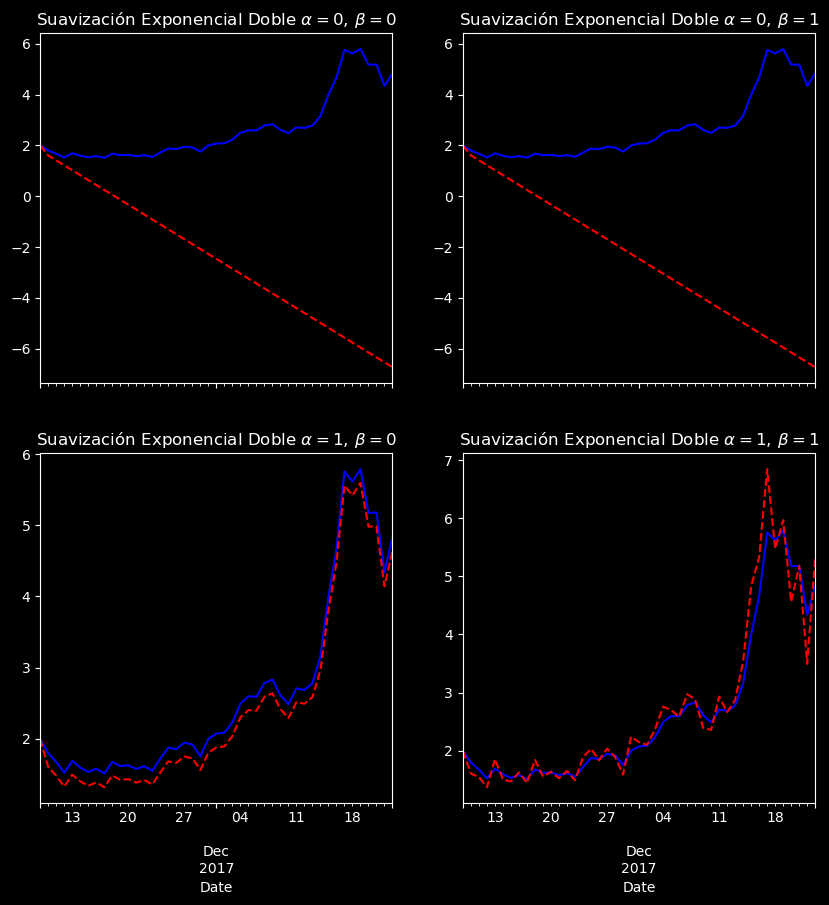

In [33]:
f, axarr = plt.subplots(2, 2, sharex=True, figsize = (20, 8))
f.set_size_inches(10, 10)

df['Close'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0, 0])
df['DEF00'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0, 0])
axarr[0, 0].set_title(r'Suavización Exponencial Doble $\alpha=0,\,\beta=0$')

df['Close'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0, 1])
df['DEF01'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0, 1])
axarr[0, 1].set_title(r'Suavización Exponencial Doble $\alpha=0,\,\beta=1$')

df['Close'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1, 0])
df['DEF10'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1, 0])
axarr[1, 0].set_title(r'Suavización Exponencial Doble $\alpha=1,\,\beta=0$');

df['Close'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1, 1])
df['DEF11'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1, 1])
axarr[1, 1].set_title(r'Suavización Exponencial Doble $\alpha=1,\,\beta=1$');


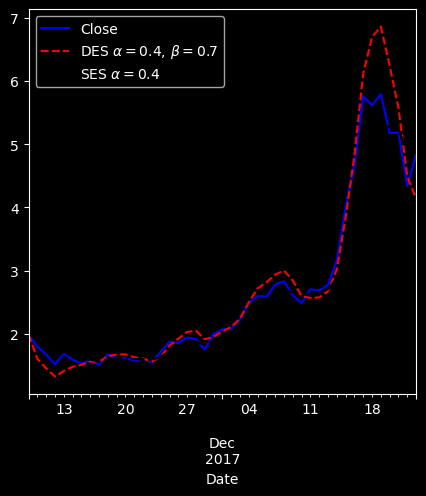

In [34]:
df['DEF'] = double_exp_smoothing(df['Close'], 0.4, 0.7)
df['Previsión_exponencial_única'] = single_exp_smoothing(df['Close'],
0.4)

fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
df['Close'].iloc[:45].plot(color='b', linestyle = '-', label = 'Close')
df['DEF'].iloc[:45].plot(color='r', linestyle = '--', label = r'DES $\alpha=0.4,\,\beta=0.7$')
                              
df['Previsión_exponencial_única'].iloc[:45].plot(color='k', linestyle = '-.',
label = r'SES $\alpha=0.4$')
leg = ax.legend();

In [35]:
import pandas as pd


def SMA(array, n):
    """Media móvil simple"""
    return pd.Series(array).rolling(n).mean()


def RSI(array, n):
    """Índice de fuerza relativa"""
    # Approximate; good enough,(Aproximado; suficientemente bueno)
    gain = pd.Series(array).diff()
    loss = gain.copy()
    gain[gain < 0] = 0
    loss[loss > 0] = 0
    rs = gain.ewm(n).mean() / loss.abs().ewm(n).mean()
    return 100 - 100 / (1 + rs)

In [36]:
from backtesting import Strategy, Backtest
from backtesting.lib import resample_apply


class System(Strategy):
    d_rsi = 30  # Daily RSI lookback periods (Períodos diarios RSI lookback)
    w_rsi = 30  # Weekly(Semanal)
    level = 70
    
    def init(self):
        # Calcular las medias móviles que exige la estrategia
        self.ma10 = self.I(SMA, self.data.Close, 10)
        self.ma20 = self.I(SMA, self.data.Close, 20)
        self.ma50 = self.I(SMA, self.data.Close, 50)
        self.ma100 = self.I(SMA, self.data.Close, 100)
        
        # Compute daily RSI(30) (Calcular RSI(30) diario)
        self.daily_rsi = self.I(RSI, self.data.Close, self.d_rsi)
        
        # (Para construir el RSI semanal, podemos utilizar `resample_apply()`.)
        # helper function from the library
        self.weekly_rsi = resample_apply(
            'W-FRI', RSI, self.data.Close, self.w_rsi)
        
        
    def next(self):
        price = self.data.Close[-1]
        
        # (Si aún no tenemos una posición, y)
        # si se cumplen todas las condiciones, introduzca largo.
        if (not self.position and
            self.daily_rsi[-1] > self.level and
            self.weekly_rsi[-1] > self.level and
            self.weekly_rsi[-1] > self.daily_rsi[-1] and
            self.ma10[-1] > self.ma20[-1] > self.ma50[-1] > self.ma100[-1] and
            price > self.ma10[-1]):
            
            # Comprar a precio de mercado en la siguiente apertura, pero no
            # set 8% fixed stop loss.(establecer un stop loss fijo del 8)
            self.buy(sl=.92 * price)
        
        # 
        #(Cierro la posición Si el precio cierra a un 2% o más por debajo de la MA de 10 días)
        elif price < .98 * self.ma10[-1]:
            self.position.close()

In [37]:
from backtesting.test import GOOG

backtest = Backtest(GOOG, System, commission=.002)
backtest.run()

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                    2.793296
Equity Final [$]                  10017.44422
Equity Peak [$]                    10978.3801
Return [%]                           0.174442
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                     0.02045
Volatility (Ann.) [%]                4.941212
Sharpe Ratio                         0.004139
Sortino Ratio                         0.00536
Calmar Ratio                         0.002043
Max. Drawdown [%]                   -10.00745
Avg. Drawdown [%]                   -9.340092
Max. Drawdown Duration     2653 days 00:00:00
Avg. Drawdown Duration     1410 days 00:00:00
# Trades                                    4
Win Rate [%]                             25.0
Best Trade [%]                       9.687579
Worst Trade [%]                     -4.456159
Avg. Trade [%]                    

In [38]:
%%time

stats = backtest.optimize(d_rsi=range(10, 35, 5),
                  w_rsi=range(10, 35, 5),
                  level=range(30, 80, 10))
stats

Backtest.optimize:   0%|          | 0/5 [00:00<?, ?it/s]

CPU times: user 165 ms, sys: 64.3 ms, total: 230 ms
Wall time: 6.3 s


Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   22.486034
Equity Final [$]                  22587.83224
Equity Peak [$]                   23395.59144
Return [%]                         125.878322
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    10.03124
Volatility (Ann.) [%]               13.124247
Sharpe Ratio                         0.764329
Sortino Ratio                         1.28711
Calmar Ratio                         0.530172
Max. Drawdown [%]                  -18.920719
Avg. Drawdown [%]                   -3.795058
Max. Drawdown Duration      778 days 00:00:00
Avg. Drawdown Duration       97 days 00:00:00
# Trades                                   23
Win Rate [%]                        65.217391
Best Trade [%]                      25.034669
Worst Trade [%]                     -6.297769
Avg. Trade [%]                    

In [39]:
stats['_equity_curve']  # Drawdown Duration sólo se define al final de los periodos DD.

,Equity,DrawdownPct,DrawdownDuration
2004-08-19,10000.00000,0.000000,NaT
2004-08-20,10000.00000,0.000000,NaT
2004-08-23,10000.00000,0.000000,NaT
2004-08-24,10000.00000,0.000000,NaT
2004-08-25,10000.00000,0.000000,NaT
...,...,...,...
2013-02-25,22390.99224,0.042940,NaT
2013-02-26,22373.07224,0.043706,NaT
2013-02-27,22643.27224,0.032156,NaT
2013-02-28,22683.03224,0.030457,NaT


In [40]:
stats['_trades']  # Datos individuales() 

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,49,104,108,201.37194,188.69,-621.41506,-0.062978,2005-01-18,2005-01-24,6 days
1,42,174,207,219.93900,275.00,2312.56200,0.250347,2005-04-28,2005-06-15,48 days
2,40,211,235,288.64614,295.01,254.55440,0.022047,2005-06-21,2005-07-26,35 days
3,38,276,291,312.12300,302.00,-384.67400,-0.032433,2005-09-22,2005-10-13,21 days
4,33,300,328,346.97256,408.70,2037.00552,0.177903,2005-10-26,2005-12-06,41 days
5,32,334,346,417.87408,422.52,148.66944,0.011118,2005-12-14,2006-01-03,20 days
6,30,347,357,444.78780,451.17,191.46600,0.014349,2006-01-04,2006-01-19,15 days
7,30,549,574,463.20456,481.13,537.76320,0.038699,2006-10-23,2006-11-28,36 days
8,29,701,735,498.90582,519.01,583.02122,0.040297,2007-06-04,2007-07-23,49 days
9,26,779,814,562.12200,657.74,2486.06800,0.170102,2007-09-24,2007-11-12,49 days


In [41]:
backtest.plot()

Row(id='1627', ...)